In [1]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [2]:
import pandas, numpy

In [3]:
input_file = '/Users/adrian/research/keflavik/results/deseq2/DESeq2_TPM_values.tsv'

target_gene = 'ENSG00000136169' # SETDB2
target_gene = 'ENSG00000170558' # CDH2
# target_gene = 'ENSG00000099250' # NRP1
# target_gene = 'ENSG00000148516' # ZEB1
# target_gene = 'ENSG00000115414' # FN1

In [4]:
df = pandas.read_csv(input_file, sep='\t', index_col=0)
df

,M104_EV_1,M104_EV_2,M104_EV_3,M104_SET_1,M104_SET_2,M104_SET_3,M501_miR1_1,M501_miR1_2,M501_miR1_3,M501_miR2_1,...,M501_miRN_3,Sk28_miR1_1,Sk28_miR1_2,Sk28_miR1_3,Sk28_miR2_1,Sk28_miR2_2,Sk28_miR2_3,Sk28_miRN_1,Sk28_miRN_2,Sk28_miRN_3
ENSG00000000003,6.797406,8.013142,7.871205,8.252495,9.418473,7.909508,12.352898,11.469885,10.944441,9.755530,...,11.880304,7.567135,7.507606,6.619564,6.179612,7.325397,6.394710,8.402954,6.701116,7.042579
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,112.348307,103.428952,103.173280,105.785402,118.876836,121.678807,158.477745,150.412564,150.063555,153.145267,...,173.792994,172.140162,178.226073,161.903129,164.613884,156.342292,170.112319,172.158284,157.345640,155.517503
ENSG00000000457,2.910259,2.978912,2.889032,3.886458,2.866137,2.533814,6.935119,7.243830,6.533486,3.971509,...,4.908820,4.337312,3.374034,4.334404,4.541130,4.682219,4.271148,3.474064,3.740030,2.881081
ENSG00000000460,8.850792,9.507742,7.147435,20.763536,12.947957,11.171865,27.126479,28.214651,28.099204,27.864735,...,27.862659,16.691221,20.382040,16.822327,15.707889,17.253575,16.989679,17.025442,15.325235,19.238128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000293548,0.073071,0.000000,0.000000,0.101225,0.092270,0.137253,0.051730,0.078912,0.116115,0.103318,...,0.045053,0.000000,0.084325,0.000000,0.100518,0.000000,0.055765,0.000000,0.106823,0.000000
ENSG00000293550,0.013432,0.064740,0.036410,0.045137,0.015762,0.050114,0.047324,0.064582,0.071849,0.122841,...,0.028002,0.009500,0.000000,0.019536,0.000000,0.008583,0.018779,0.030867,0.000000,0.000000
ENSG00000293553,0.000000,0.000000,0.000000,0.000000,0.000000,0.081065,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000293563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


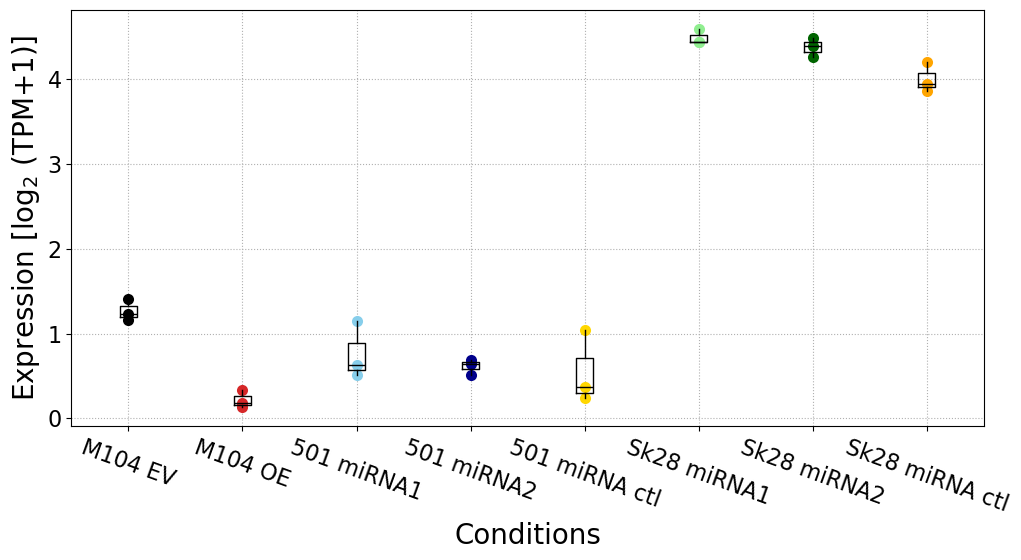

In [5]:
my_colors = ['black', 'tab:red', 'skyblue', 'darkblue', 'gold', 'lightgreen', 'darkgreen', 'orange']
for group in range(8):
    initial = group * 3
    final = initial + 3
    tpm = df.loc[target_gene, ].iloc[initial:final].values
    log2tpm_po = numpy.log2(tpm + 1)

    matplotlib.pyplot.plot(numpy.repeat(group, len(tpm)), log2tpm_po, 'o', color=my_colors[group], alpha=3/3, mec='none', markersize=8)
    matplotlib.pyplot.boxplot(log2tpm_po, positions=[group], showcaps=False, medianprops=dict(color='black'))

matplotlib.pyplot.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['M104 EV', 'M104 OE', '501 miRNA1', '501 miRNA2', '501 miRNA ctl', 'Sk28 miRNA1', 'Sk28 miRNA2', 'Sk28 miRNA ctl'], rotation=-20)
matplotlib.pyplot.ylabel('Expression [log$_2$ (TPM+1)]')
matplotlib.pyplot.xlabel('Conditions')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('expression.svg')